In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

In [2]:
# Riot Developer Portal에서 받은 API KEY입니다.
# 해당 값을 포함한 모든 종류의 KEY는 코드에 직접적으로 노출되지 않도록 하는 것이 좋습니다.
api_key = 'RGAPI-########-####-####-####-############'

# 본인 소환사명입니다.
summoner_name = '봄꽃동화룰루'

In [3]:
# SUMMONER-V4 API URL
# 소환사 정보를 requesturl 한 것이다.
requesturl = 'https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/'+summoner_name+\
'?api_key='+api_key

In [4]:
r = requests.get(requesturl)
r.json()

{'id': 'htLlECoLbCvxl9uVQfIqccrmD4bgFQPAnWXP5pZmYzcpRWs',
 'accountId': 'aYzeSc6KUErs4maCmpttcZ_Ce0APASzmmyK38sfTmnv_lXc',
 'puuid': 'EN_7hhinhk74FnL-yv8lL05A83_G1GFbmsjqfI4dadOBiBLOWk4qeb99ZQYM1gtGn1QvwiUwnl1niw',
 'name': '봄꽃동화룰루',
 'profileIconId': 3790,
 'revisionDate': 1634283701000,
 'summonerLevel': 261}

In [5]:
# 본인 puuid입니다.
# puuid가 데이터베이스에 저장되는 자기자신의 닉네임이다.
summoner_puuid = r.json()['puuid']

In [6]:
# MATCH-V5 API URL
requesturl = 'https://asia.api.riotgames.com/lol/match/v5/matches/by-puuid/'+summoner_puuid+\
'/ids?start=0&count=30&api_key='+api_key

In [7]:
r = requests.get(requesturl)
matchId = r.json()[0]

In [8]:
# MATCH-V5 API URL
requesturl = 'https://asia.api.riotgames.com/lol/match/v5/matches/'+matchId\
+'?api_key='+api_key

In [9]:
# 가장 최근 게임(matchId) requests해서 불러옴
r = requests.get(requesturl)

In [10]:
# 게임 데이터 확인
# r.json()

In [11]:
# 모든 column print하게 설정 변경
pd.set_option('display.max_columns',None)

In [12]:
# DataFrame으로 변환
df = pd.DataFrame(r.json()['info']['participants'])

In [13]:
# 확인할 변수
COLUMNS = ['totalDamageDealtToChampions','totalDamageTaken']

In [14]:
df2 = df[COLUMNS]

In [15]:
df2.columns = ['DamageDealt', 'DamageTaken']

In [16]:
df2

,DamageDealt,DamageTaken
0,6412,19011
1,9590,14033
2,6798,12957
3,3548,9520
4,4911,11146
5,16205,11369
6,5799,15098
7,16521,6232
8,7626,10114
9,5449,9162


In [17]:
c1 = r.json()['info']['participants'][0]['championName']
c2 = r.json()['info']['participants'][1]['championName']
c3 = r.json()['info']['participants'][2]['championName']
c4 = r.json()['info']['participants'][3]['championName']
c5 = r.json()['info']['participants'][4]['championName']
c6 = r.json()['info']['participants'][5]['championName']
c7 = r.json()['info']['participants'][6]['championName']
c8 = r.json()['info']['participants'][7]['championName']
c9 = r.json()['info']['participants'][8]['championName']
c10 = r.json()['info']['participants'][9]['championName']

In [18]:
df2.index = [c1, c2, c3, c4, c5, c6, c7, c8, c9, c10]

In [19]:
df2

,DamageDealt,DamageTaken
Aatrox,6412,19011
Graves,9590,14033
TwistedFate,6798,12957
Jinx,3548,9520
Ekko,4911,11146
Malphite,16205,11369
Shaco,5799,15098
Xerath,16521,6232
Ashe,7626,10114
Lulu,5449,9162


<AxesSubplot:>

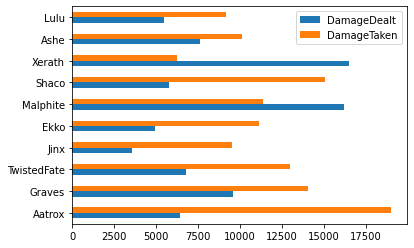

In [20]:
ax = plt.subplots()
df2.plot(kind='barh', ax=ax[1])